In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the file
df_train = pd.read_csv('train_FD001.csv')
df_train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# Find unneeded columns and delete
desc = df_train.describe().T
print(desc[['min', 'max', 'std']])
col_to_drop = [
    'setting_1', 'setting_2', 'setting_3',
                's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19'
]
df_train = df_train.drop(columns=col_to_drop)
# Find max life cycle of each engine
max_life = df_train.groupby('unit_nr')['time_cycles'].max().reset_index()
max_life.columns = ['unit_nr', 'max_life']
# Merge with the main table
df_train = df_train.merge(max_life, on='unit_nr', how='left')

                   min        max           std
unit_nr         1.0000   100.0000  2.922763e+01
time_cycles     1.0000   362.0000  6.888099e+01
setting_1      -0.0087     0.0087  2.187313e-03
setting_2      -0.0006     0.0006  2.930621e-04
setting_3     100.0000   100.0000  0.000000e+00
s_1           518.6700   518.6700  0.000000e+00
s_2           641.2100   644.5300  5.000533e-01
s_3          1571.0400  1616.9100  6.131150e+00
s_4          1382.2500  1441.4900  9.000605e+00
s_5            14.6200    14.6200  1.776400e-15
s_6            21.6000    21.6100  1.388985e-03
s_7           549.8500   556.0600  8.850923e-01
s_8          2387.9000  2388.5600  7.098548e-02
s_9          9021.7300  9244.5900  2.208288e+01
s_10            1.3000     1.3000  0.000000e+00
s_11           46.8500    48.5300  2.670874e-01
s_12          518.6900   523.3800  7.375534e-01
s_13         2387.8800  2388.5600  7.191892e-02
s_14         8099.9400  8293.7200  1.907618e+01
s_15            8.3249     8.5848  3.750

In [5]:
# Calculate RUL 
df_train['RUL'] = df_train['max_life'] - df_train['time_cycles']
df_train

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,max_life,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,200,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,200,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,200,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,200,1


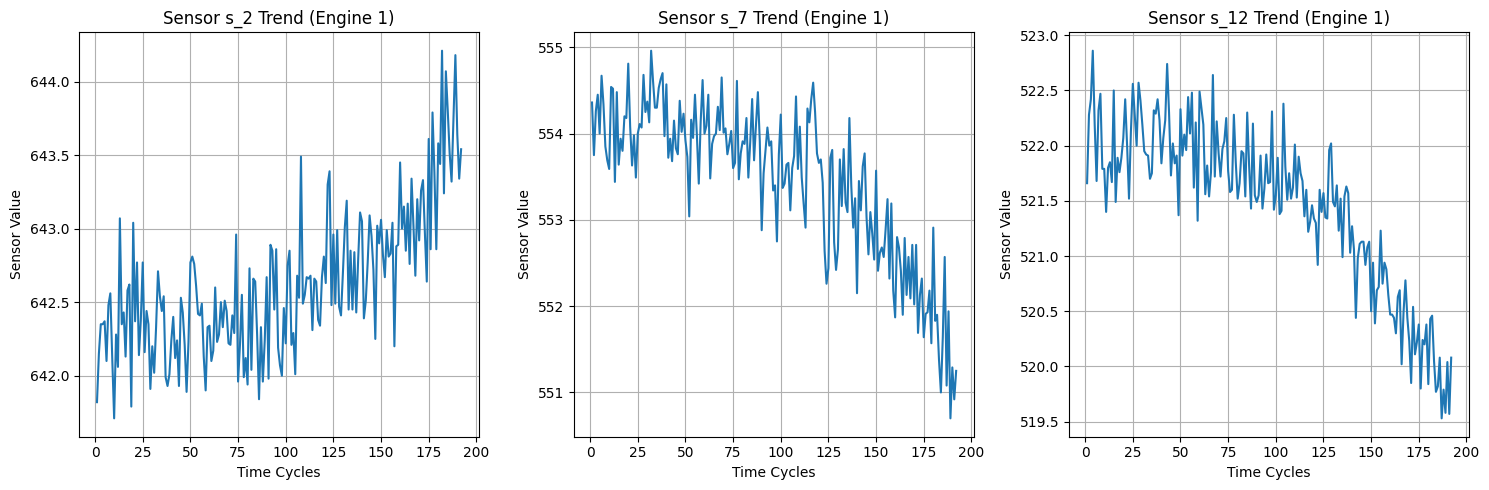

In [6]:
# Plot 
# Select engine 1
engine_id = 1
df_engine = df_train[df_train['unit_nr'] == engine_id]

# Plot with 3 important sensors (s_2 (Temperature), s_7 (Pressure), s_12 (Fan Speed))
cols_to_plot = ['s_2', 's_7', 's_12']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i+1)
    plt.plot(df_engine['time_cycles'], df_engine[col])
    plt.title(f'Sensor {col} Trend (Engine {engine_id})')
    plt.xlabel('Time Cycles')
    plt.ylabel('Sensor Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Define smoothing function
def smooth_data(df, sensors, window_size=5):
    df_smoothed = df.copy()
    
    # Calculate rolling mean for each engine
    for sensor in sensors:
        df_smoothed[sensor] = df.groupby('unit_nr')[sensor].transform(
            lambda x: x.rolling(window=window_size).mean())
    
    # Delete null rows created by rolling
    df_smoothed.dropna(inplace=True)
    return df_smoothed

# Apply smoothing function
sensors_to_clean = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_15', 's_17', 's_20', 's_21']
df_clean = smooth_data(df_train, sensors_to_clean, window_size=5)

print("Data shape after noise reduction:", df_clean.shape)

Data shape after noise reduction: (20231, 18)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
features = sensors_to_clean
target = 'RUL'

X = df_clean[features]
y = df_clean[target]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f} cycles")

Model RMSE: 37.22 cycles


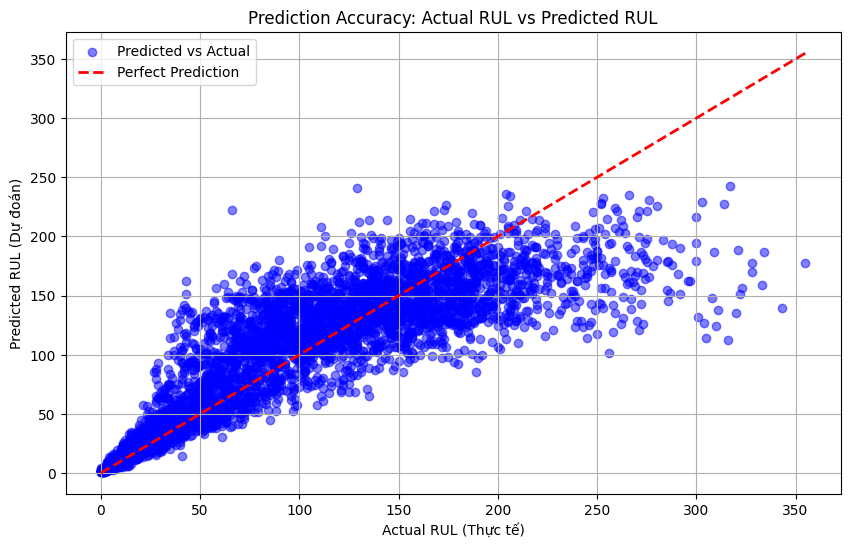

In [14]:
# Plot prediction results
plt.figure(figsize=(10, 6))

# Vẽ điểm dự đoán (Scatter plot)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

# Vẽ đường chuẩn lý tưởng (Perfect Prediction Line)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')

plt.title('Prediction Accuracy: Actual RUL vs Predicted RUL')
plt.xlabel('Actual RUL (Thực tế)')
plt.ylabel('Predicted RUL (Dự đoán)')
plt.legend()
plt.grid(True)
plt.show()

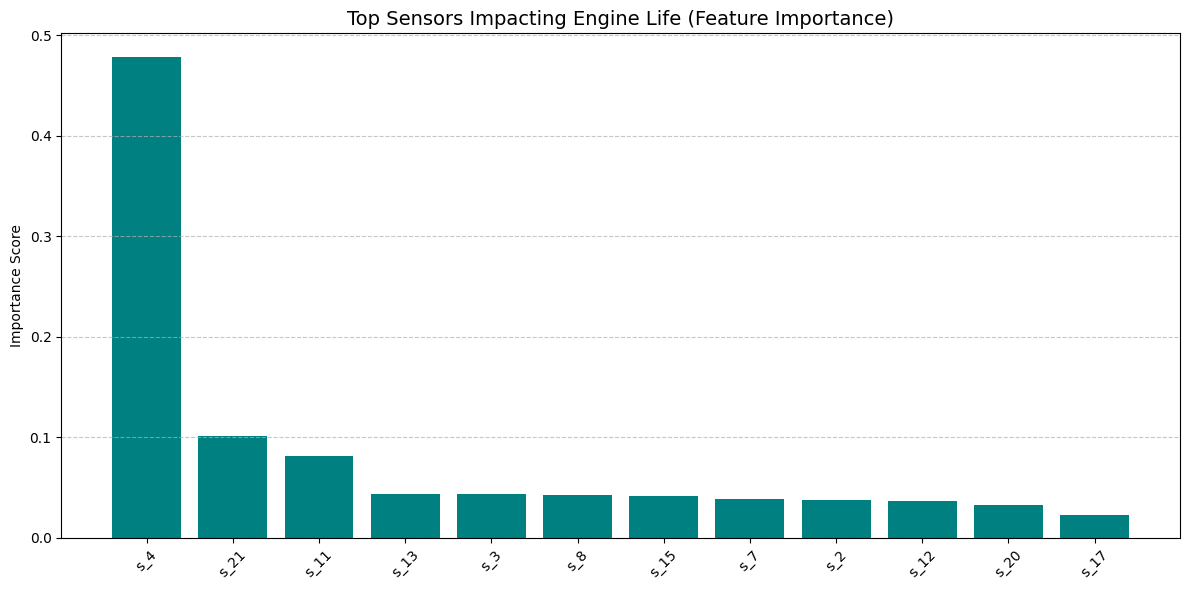

In [15]:
# Feature Importance Analysis
# Get feature importance from model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # Sort descending

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Top Sensors Impacting Engine Life (Feature Importance)", fontsize=14)
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.ylabel('Importance Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29080\678799348.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  engine_demo_smooth = df_clean[df_train['unit_nr'] == 1]


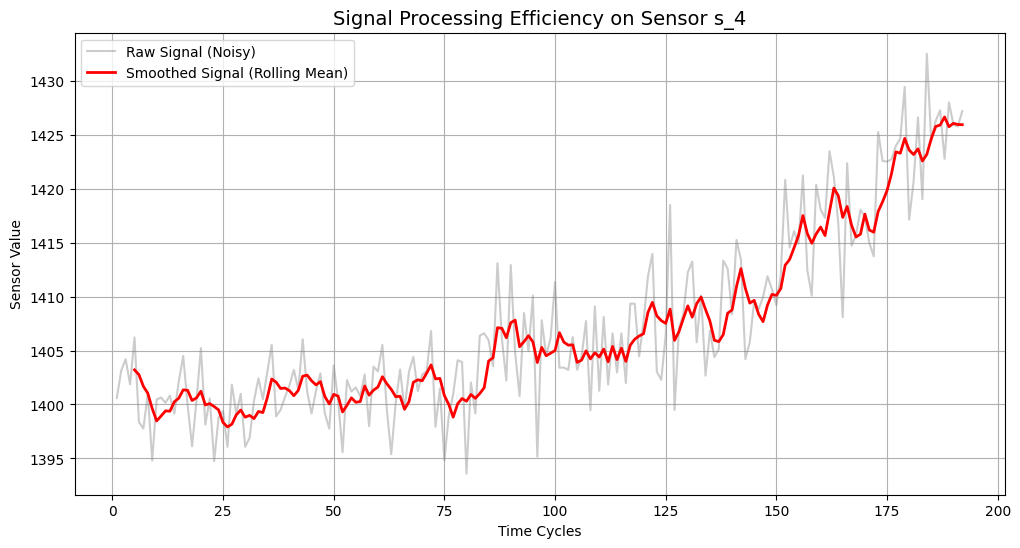

In [17]:
# Visualize signal processing efficiency
# Select top sensor based on feature importance
top_sensor = features[indices[0]] 
engine_demo = df_train[df_train['unit_nr'] == 1] 
engine_demo_smooth = df_clean[df_train['unit_nr'] == 1]

plt.figure(figsize=(12, 6))

# Plot raw signal (background) - Use engine_demo time
plt.plot(engine_demo['time_cycles'], engine_demo[top_sensor], 
         color='gray', alpha=0.4, label='Raw Signal (Noisy)')

# Plot smoothed signal (highlight) - FIX: Use engine_demo_smooth time
plt.plot(engine_demo_smooth['time_cycles'], engine_demo_smooth[top_sensor], 
         color='red', linewidth=2, label='Smoothed Signal (Rolling Mean)')

plt.title(f'Signal Processing Efficiency on Sensor {top_sensor}', fontsize=14)
plt.xlabel('Time Cycles')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True)
plt.show()